In [1]:
import pandas as pd #data processing 
import numpy as np #numerical computing 
from numpy import array
import re #string manipulation 



In [2]:
!pip install nltk



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import nltk #NlP 
from nltk.corpus import stopwords # a list of common stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [4]:
import string

In [5]:
!pip install textblob


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install  tensorflow keras


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()



Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
import tensorflow as tf #deploying artificial neural networks


In [10]:
import matplotlib.pyplot as plt #plots and visualizations
import seaborn as sns

In [11]:
from keras.preprocessing.text import one_hot, Tokenizer #one_hot function to convert text data into binary matrix representation where each word is a unique index
                                                        #tokenizer class for indexing words in a text corpus
from keras.models import Sequential #feedforward neural networks
from keras.layers import Activation, Dropout, Dense # Activation function to the output of the previous layer 
                                                    #Dropout layer for prevent overfitting
                                                 # Dense layer means each neuron in the layer is connected to every neuron in the previous and next layer.fully connected
from tensorflow.keras.layers import  Conv1D, LSTM, SimpleRNN, Embedding,SpatialDropout1D  #LSTM layer is a type of recurrent layer that is capable of learning long-term dependencies in sequential data
                                                                #SimpleRNN is  a basic recurrent layer that can capture short-term dependencies in sequential data.
                                                                #Embedding layer for converting integer indices representing words into dense vectors of fixed size. 
   

In [12]:
!pip install  scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
from keras.preprocessing.sequence import pad_sequences #pad_sequences is used to ensure that all sequences have the same length by padding shorter sequences with zeros.

2.LOAD DATA 

In [15]:
df=pd.read_csv ('IMDB Dataset.csv')


In [16]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


3. DATA INFOS


In [17]:
df.shape   #number of rows and columns

(50000, 2)

In [18]:
df.info() # 2 columns object data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [19]:
print ("Any missing value?", df.isnull().values.any()) #check for missing values 

Any missing value? False


In [20]:
df.describe(include='all') #overall statistics 

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [21]:
df['review'][38] #Example of a data point 

"Okay, so this series kind of takes the route of 'here we go again!' Week in, week out David Morse's character helps out his ride who is in a bit of a pickle - but what's wrong with that!? David Morse is one of the greatest character actors out there, and certainly the coolest, and to have him in a series created by David Koepp - a great writer - is heaven!!<br /><br />Due to the lack of love for this show by many, I can't see it going to a season series - but you never know? The amount of rubbish that has made it beyond that baffles me - let's hope something good can make it past a first series!!!"

In [22]:
df["sentiment"][38]

'positive'

In [23]:
random_state = 38

In [24]:
df["sentiment"].value_counts() #checking for imbalances

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [25]:
sns.set_theme(style='ticks', palette='BrBG')

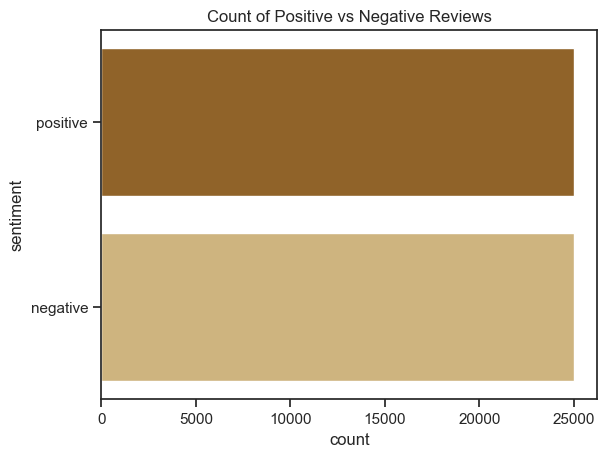

In [26]:
sns.countplot(data=df, y='sentiment')\
   .set(title='Count of Positive vs Negative Reviews')

plt.show()                                               #Count of Positive vs Negative Reviews graph

4.DATA CLEANING AND PREPROCESSING 

In [27]:
df.drop_duplicates(subset=['review'], inplace=True) # drop duplicates

In [28]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True) #convert the values in the 'sentiment' column from strings ('positive' and 'negative') to numerical values (1 and 0)

In [29]:
def print_random_review() -> None:
    random_review = df.review.sample(n=1, random_state=random_state).values  # select and print a random review in full
    print(random_review[0])

print_random_review()

Joan Cusack steals the show! The premise is good, the plot line interesting and the screenplay was OK. A tad too simplistic in that a coming-out story of a gay man was so positive when it is usually not quite-so-positive. Then again, it IS fiction. :) All in all an entertaining romp.<br /><br />One thing I noticed was the "inside-joke" aspect. Since the target-audience probably was straight, they may not get the gay "stuff" in context with the story. <br /><br />Kevin Kline showed a facet of his acting prowess that screenwriters sometimes don't take in consideration when suggesting Kline for a part.<br /><br />This one hit the mark.


In [30]:
def remove_html_tags(text: str) -> str: #Remove HTML tags
    pattern = re.compile('<.*?>')  # find and replace html tag patterns in text
    return pattern.sub(r'', text)

In [31]:
df['review'] = df.review.apply(remove_html_tags)

In [32]:
print_random_review()

Joan Cusack steals the show! The premise is good, the plot line interesting and the screenplay was OK. A tad too simplistic in that a coming-out story of a gay man was so positive when it is usually not quite-so-positive. Then again, it IS fiction. :) All in all an entertaining romp.One thing I noticed was the "inside-joke" aspect. Since the target-audience probably was straight, they may not get the gay "stuff" in context with the story. Kevin Kline showed a facet of his acting prowess that screenwriters sometimes don't take in consideration when suggesting Kline for a part.This one hit the mark.


In [33]:
def remove_urls(text: str) -> str:
    pattern= re.compile(r'https?://\S+|www\.\S+', flags=re.IGNORECASE)  # find and replace url patterns in text
    return pattern.sub(r'', text)


df['review'] = df.review.apply(remove_urls) # apply the function to reviews

print_random_review()

Joan Cusack steals the show! The premise is good, the plot line interesting and the screenplay was OK. A tad too simplistic in that a coming-out story of a gay man was so positive when it is usually not quite-so-positive. Then again, it IS fiction. :) All in all an entertaining romp.One thing I noticed was the "inside-joke" aspect. Since the target-audience probably was straight, they may not get the gay "stuff" in context with the story. Kevin Kline showed a facet of his acting prowess that screenwriters sometimes don't take in consideration when suggesting Kline for a part.This one hit the mark.


In [34]:
df['review'] = df.review.str.lower()
                                         #Convert all reviews to lower case text strings 
print_random_review()                                      

joan cusack steals the show! the premise is good, the plot line interesting and the screenplay was ok. a tad too simplistic in that a coming-out story of a gay man was so positive when it is usually not quite-so-positive. then again, it is fiction. :) all in all an entertaining romp.one thing i noticed was the "inside-joke" aspect. since the target-audience probably was straight, they may not get the gay "stuff" in context with the story. kevin kline showed a facet of his acting prowess that screenwriters sometimes don't take in consideration when suggesting kline for a part.this one hit the mark.


In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
stop_words = stopwords.words('english')
print(stop_words)                          


def remove_stop_words(text: str) -> str:
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
df['review'] = df.review.apply(remove_stop_words)
print_random_review()                               #Remove stop words                          

joan cusack steals show! premise good, plot line interesting screenplay ok. tad simplistic coming-out story gay man positive usually quite-so-positive. again, fiction. :) entertaining romp.one thing noticed "inside-joke" aspect. since target-audience probably straight, may get gay "stuff" context story. kevin kline showed facet acting prowess screenwriters sometimes take consideration suggesting kline part.this one hit mark.


In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
def remove_punctuations(text: str) -> str:
    return text.translate(str.maketrans('', '', string.punctuation))
df['review'] = df.review.apply(remove_punctuations)
print_random_review()

joan cusack steals show premise good plot line interesting screenplay ok tad simplistic comingout story gay man positive usually quitesopositive again fiction  entertaining rompone thing noticed insidejoke aspect since targetaudience probably straight may get gay stuff context story kevin kline showed facet acting prowess screenwriters sometimes take consideration suggesting kline partthis one hit mark


In [40]:
df['review'] = df.review.str.replace(r'\d+', r'', regex=True)

print_random_review()                                           #remove digits

joan cusack steals show premise good plot line interesting screenplay ok tad simplistic comingout story gay man positive usually quitesopositive again fiction  entertaining rompone thing noticed insidejoke aspect since targetaudience probably straight may get gay stuff context story kevin kline showed facet acting prowess screenwriters sometimes take consideration suggesting kline partthis one hit mark


In [41]:
from textblob import Word

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
def lemmatize_words(text: str) -> str:
    words = [Word(word).lemmatize() for word in text.split()]
    return " ".join(words)

In [43]:
df['review'] = df.review.apply(lemmatize_words)

print_random_review()

joan cusack steal show premise good plot line interesting screenplay ok tad simplistic comingout story gay man positive usually quitesopositive again fiction entertaining rompone thing noticed insidejoke aspect since targetaudience probably straight may get gay stuff context story kevin kline showed facet acting prowess screenwriter sometimes take consideration suggesting kline partthis one hit mark


In [44]:
def tokenize(text):
    return word_tokenize(text) #tokenization function

In [45]:
df['review'] = df.review.apply(tokenize)

In [46]:
print_random_review()

['joan', 'cusack', 'steal', 'show', 'premise', 'good', 'plot', 'line', 'interesting', 'screenplay', 'ok', 'tad', 'simplistic', 'comingout', 'story', 'gay', 'man', 'positive', 'usually', 'quitesopositive', 'again', 'fiction', 'entertaining', 'rompone', 'thing', 'noticed', 'insidejoke', 'aspect', 'since', 'targetaudience', 'probably', 'straight', 'may', 'get', 'gay', 'stuff', 'context', 'story', 'kevin', 'kline', 'showed', 'facet', 'acting', 'prowess', 'screenwriter', 'sometimes', 'take', 'consideration', 'suggesting', 'kline', 'partthis', 'one', 'hit', 'mark']


4.Model Development

In [47]:
df['review'] = df['review'].apply(lambda x: ' '.join(map(str, x))) #convert list to strings

In [48]:
print_random_review()

joan cusack steal show premise good plot line interesting screenplay ok tad simplistic comingout story gay man positive usually quitesopositive again fiction entertaining rompone thing noticed insidejoke aspect since targetaudience probably straight may get gay stuff context story kevin kline showed facet acting prowess screenwriter sometimes take consideration suggesting kline partthis one hit mark


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [63]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X = tfidf_vectorizer.fit_transform(df['review'])        # Feature Extraction using TF-IDF
y = df['sentiment']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
classifier = LogisticRegression(max_iter=1000) #Logistic Regression

In [66]:
classifier.fit(X_train, y_train) # Train Model

LogisticRegression(max_iter=1000)

In [67]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)                             #MODEL EVALUATION PARAMETERS
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8822224463043259
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.87      0.89      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917

